<a href="https://www.kaggle.com/code/zittagustavo/spotify-clustering-recommendations?scriptVersionId=123049577" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introdução

## Dicionário dos dados

[Spotify API](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)

* `Acousticness/Acústica:` Variável numérica, medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

* `Danceability/Dançabilidade:` Variável numérica, a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos dançável e 1,0 é o mais dançável.

* `Duration_ms:`Variável numérica, a duração da trilha em milissegundos.

* `Duration_min:` Variável numérica, a duração da faixa em minutos.

* `Energy/Energia:` Variável numérica, Energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

* `Explicit/Explícito:` Variável categórica, se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

* `Id:` O ID do Spotify para a faixa.

* `Instrumentalness/Instrumentalidade:` Variável numérica, prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

* `Key/Chave:`Variável numérica, a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo. 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

* `Liveness/ Ao vivo:` Variável numérica, detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

* `Loudness/ Volume em dB:` Variável numérica, volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db.

* `Mode/ Modo:` Variável numérica, o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

* `Popularity/Popularidade:` Variável numérica, a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

* `Speechiness/Fala:` Variável numérica, a fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

* `Tempo:` Variável numérica, Tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

* `Valence/Valência:` Variável numérica, Medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimida, irritada).

* `Year/Ano:` Ano em que a música foi lançada.

## Analise dos dados

**Bases dadas**

* [Dados gerais de músicas](https://raw.githubusercontent.com/sthemonica/music-clustering/main/curso/dados_curso.csv)

* [Dados relacionados à gêneros](https://raw.githubusercontent.com/sthemonica/music-clustering/main/spotify/data_by_genres.csv)

* [Dados relacionados aos anos](https://raw.githubusercontent.com/sthemonica/music-clustering/main/spotify/data_by_year.csv)

In [1]:
#importando o numpy e pandas
import pandas as pd
import numpy as np

In [2]:
#dados de musicas e metricas gerais
dados = pd.read_csv('/kaggle/input/spotify-musicas-dataset/Dados_totais.csv')
#dados de generos de musicas
dados_generos = pd.read_csv('/kaggle/input/spotify-musicas-dataset/data_by_genres.csv')
#dados das musicas conforme os anos passam
dados_anos = pd.read_csv('/kaggle/input/spotify-musicas-dataset/data_by_year.csv')

In [3]:
dados.head(2)

valence  year  acousticness   artists  danceability  duration_ms  energy  \
0    0.285  2000       0.00239  Coldplay         0.429       266773   0.661   
1    0.613  2000       0.14300   OutKast         0.843       270507   0.806   

   explicit                      id  instrumentalness  key  liveness  \
0         0  3AJwUDP919kvQ9QcozQPxg          0.000121   11    0.2340   
1         1  0I3q5fE6wg7LIfHGngUTnV          0.000000    4    0.0771   

   loudness  mode         name  popularity  speechiness    tempo  \
0    -7.227     1       Yellow          84       0.0281  173.372   
1    -5.946     0  Ms. Jackson          80       0.2690   94.948   

            artists_song  
0      Coldplay - Yellow  
1  OutKast - Ms. Jackson

In [4]:
dados["year"].unique()
#como podemos ver, os anos começam em 2000

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [5]:
dados.shape

(20311, 19)

In [6]:
#tirando as colunas nao desejadas
dados = dados.drop(["explicit", "key", "mode"], axis=1)
dados.head(2)

valence  year  acousticness   artists  danceability  duration_ms  energy  \
0    0.285  2000       0.00239  Coldplay         0.429       266773   0.661   
1    0.613  2000       0.14300   OutKast         0.843       270507   0.806   

                       id  instrumentalness  liveness  loudness         name  \
0  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227       Yellow   
1  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  Ms. Jackson   

   popularity  speechiness    tempo           artists_song  
0          84       0.0281  173.372      Coldplay - Yellow  
1          80       0.2690   94.948  OutKast - Ms. Jackson

In [7]:
dados.shape

(20311, 16)

In [8]:
dados.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [9]:
dados_generos.head(2)

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834    0.3616 -31.514333     0.040567   75.336500   
1  0.450678          0.477762    0.1310 -16.854000     0.076817  120.285667   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5

In [10]:
#tirando as colunas nao desejadas
dados_generos = dados_generos.drop(["key", "mode"], axis=1)
dados_generos.head(2)

genres  acousticness  danceability   duration_ms    energy  \
0  21st century classical      0.979333      0.162883  1.602977e+05  0.071317   
1                   432hz      0.494780      0.299333  1.048887e+06  0.450678   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.606834    0.3616 -31.514333     0.040567   75.336500  0.103783   
1          0.477762    0.1310 -16.854000     0.076817  120.285667  0.221750   

   popularity  
0   27.833333  
1   52.500000

In [11]:
dados_generos.isnull().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [12]:
dados_anos.head(2)

mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878   0.20571 -17.048667     0.073662  101.531493  0.379327   
1          0.434195   0.24072 -19.275282     0.116655  100.884521  0.535549   

   popularity  key  
0    0.653333    2  
1    0.140845   10

In [13]:
dados_anos["year"].unique()
#como da pra ver o ano começa em 1921

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

In [14]:
#pegando apenas os dados a partir do ano 2000
dados_anos = dados_anos[dados_anos["year"]>=2000]
dados_anos["year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [15]:
#removendo colunas indesejadas
dados_anos = dados_anos.drop(["key", "mode"], axis=1)
dados_anos.head(2)

year  acousticness  danceability    duration_ms    energy  \
79  2000      0.289323      0.590918  242724.642638  0.625413   
80  2001      0.286842      0.583318  240307.796010  0.626986   

    instrumentalness  liveness  loudness  speechiness       tempo   valence  \
79          0.101168  0.197686 -8.247766     0.089205  118.999323  0.559475   
80          0.107214  0.187026 -8.305095     0.089182  117.765399  0.541479   

    popularity  
79   46.684049  
80   48.750125

In [16]:
#resetando o index porque ele esta embaralhado por ter feito query com o ano 2000
dados_anos.reset_index()

index  year  acousticness  danceability    duration_ms    energy  \
0      79  2000      0.289323      0.590918  242724.642638  0.625413   
1      80  2001      0.286842      0.583318  240307.796010  0.626986   
2      81  2002      0.282624      0.576160  239503.283000  0.641270   
3      82  2003      0.256471      0.575763  244670.575230  0.660165   
4      83  2004      0.280559      0.567680  237378.708037  0.648868   
5      84  2005      0.255764      0.572281  237229.588205  0.653209   
6      85  2006      0.279986      0.568230  234042.914359  0.650326   
7      86  2007      0.254081      0.563414  241049.962564  0.668305   
8      87  2008      0.249192      0.579193  240107.315601  0.671461   
9      88  2009      0.261929      0.564190  238140.013265  0.670749   
10     89  2010      0.242687      0.572488  242811.804563  0.681778   
11     90  2011      0.273183      0.552867  236998.787308  0.648301   
12     91  2012      0.249953      0.570882  245807.457584  0.656571   
13     92  2013      0.257488      0.571148  242267.661437  0.645597   
14     93  2014      0.249313      0.589948  233728.314713  0.648795   
15     94  2015      0.253952      0.593774  230029.046606  0.627064   
16     95  2016      0.284171      0.600202  221396.510295  0.592855   
17     96  2017      0.286099      0.612217  211115.696787  0.590421   
18     97  2018      0.267633      0.663500  206001.007133  0.602435   
19     98  2019      0.278299      0.644814  201024.788096  0.593224   
20     99  2020      0.219931      0.692904  193728.397537  0.631232   

    instrumentalness  liveness  loudness  speechiness       tempo   valence  \
0           0.101168  0.197686 -8.247766     0.089205  118.999323  0.559475   
1           0.107214  0.187026 -8.305095     0.089182  117.765399  0.541479   
2           0.088048  0.193911 -7.686640     0.084308  119.239738  0.542397   
3           0.083049  0.196976 -7.485545     0.093926  120.914622  0.530504   
4           0.077934  0.202199 -7.601655     0.094239  121.290346  0.524489   
5           0.090194  0.190082 -7.466159     0.093334  121.617967  0.532531   
6           0.077701  0.188289 -7.265501     0.085847  121.798615  0.520028   
7           0.072957  0.196127 -7.044536     0.084347  124.087516  0.516794   
8           0.063662  0.198431 -6.843804     0.077356  123.509934  0.527542   
9           0.075872  0.205252 -7.046015     0.085458  123.463808  0.507170   
10          0.082981  0.199701 -6.909904     0.081031  123.570215  0.520895   
11          0.103772  0.203309 -7.574986     0.087479  121.483997  0.472454   
12          0.085206  0.189733 -7.260550     0.081742  121.781736  0.462709   
13          0.098365  0.199631 -7.472039     0.093849  120.806829  0.454741   
14          0.076570  0.191822 -7.067440     0.084061  122.305263  0.463049   
15          0.106787  0.188856 -7.625639     0.096779  120.115411  0.432098   
16          0.093984  0.181170 -8.061056     0.104313  118.652630  0.431532   
17          0.097091  0.191713 -8.312630     0.110536  117.202740  0.416476   
18          0.054217  0.176326 -7.168785     0.127176  121.922308  0.447921   
19          0.077640  0.172616 -7.722192     0.121043  120.235644  0.458818   
20          0.016376  0.178535 -6.595067     0.141384  124.283129  0.501048   

    popularity  
0    46.684049  
1    48.750125  
2    48.655500  
3    48.626407  
4    49.273143  
5    50.953333  
6    51.313846  
7    51.075897  
8    50.630179  
9    51.440816  
10   52.730159  
11   53.307387  
12   52.655013  
13   54.047065  
14   55.543142  
15   56.700608  
16   59.647190  
17   63.263554  
18   63.296243  
19   65.256542  
20   64.301970

In [17]:
dados_anos.isna().sum()

year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

## Análise gráfica

In [18]:
#importando biblioteca de grafico
import plotly.express as px

In [19]:
#grafico de linha continua interativo
fig = px.line(dados_anos, x="year", y="loudness", markers= True, title='Variação do loudness conforme os anos')
fig.show()

In [20]:
#modulo de multigrafico 
import plotly.graph_objects as go

In [21]:
#variacao e mudanças com a musica ao longo dos anos
fig = go.Figure()

fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['acousticness'],
                    name='Acousticness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['speechiness'],
                    name='Speechiness'))

fig.show()

In [22]:
#mapa de calor com base na correlação dos dados
fig = px.imshow(dados.corr(), text_auto=True)
fig.show()

# Clusterização por gênero

## PCA e SdandardScaler

In [23]:
dados_generos

genres  acousticness  danceability   duration_ms  \
0     21st century classical      0.979333      0.162883  1.602977e+05   
1                      432hz      0.494780      0.299333  1.048887e+06   
2                      8-bit      0.762000      0.712000  1.151770e+05   
3                         []      0.651417      0.529093  2.328809e+05   
4                 a cappella      0.676557      0.538961  1.906285e+05   
...                      ...           ...           ...           ...   
2968                    zolo      0.222625      0.547082  2.580991e+05   
2969                 zouglou      0.161000      0.863000  2.063200e+05   
2970                    zouk      0.263261      0.748889  3.060728e+05   
2971            zurich indie      0.993000      0.705667  1.984173e+05   
2972                  zydeco      0.421038      0.629409  1.716717e+05   

        energy  instrumentalness  liveness   loudness  speechiness  \
0     0.071317          0.606834  0.361600 -31.514333     0.040567   
1     0.450678          0.477762  0.131000 -16.854000     0.076817   
2     0.818000          0.876000  0.126000  -9.180000     0.047000   
3     0.419146          0.205309  0.218696 -12.288965     0.107872   
4     0.316434          0.003003  0.172254 -12.479387     0.082851   
...        ...               ...       ...        ...          ...   
2968  0.610240          0.143872  0.204206 -11.295878     0.061088   
2969  0.909000          0.000000  0.108000  -5.985000     0.081300   
2970  0.622444          0.257227  0.089678 -10.289222     0.038778   
2971  0.172667          0.468633  0.179667 -11.453333     0.348667   
2972  0.609369          0.019248  0.255877  -9.854825     0.050491   

           tempo   valence  popularity  
0      75.336500  0.103783   27.833333  
1     120.285667  0.221750   52.500000  
2     133.444000  0.975000   48.000000  
3     112.857352  0.513604   20.859882  
4     112.110362  0.448249   45.820071  
...          ...       ...         ...  
2968  125.494919  0.596155   33.778943  
2969  119.038000  0.845000   58.000000  
2970  101.965222  0.824111   46.666667  
2971   91.278000  0.739000    0.000000  
2972  126.366087  0.808544   30.261905  

[2973 rows x 12 columns]

In [24]:
dados_generos['genres'].value_counts().sum()

2973

In [25]:
#tirando a coluna genero
dados_generos1 = dados_generos.drop('genres', axis=1)
dados_generos1

acousticness  danceability   duration_ms    energy  instrumentalness  \
0         0.979333      0.162883  1.602977e+05  0.071317          0.606834   
1         0.494780      0.299333  1.048887e+06  0.450678          0.477762   
2         0.762000      0.712000  1.151770e+05  0.818000          0.876000   
3         0.651417      0.529093  2.328809e+05  0.419146          0.205309   
4         0.676557      0.538961  1.906285e+05  0.316434          0.003003   
...            ...           ...           ...       ...               ...   
2968      0.222625      0.547082  2.580991e+05  0.610240          0.143872   
2969      0.161000      0.863000  2.063200e+05  0.909000          0.000000   
2970      0.263261      0.748889  3.060728e+05  0.622444          0.257227   
2971      0.993000      0.705667  1.984173e+05  0.172667          0.468633   
2972      0.421038      0.629409  1.716717e+05  0.609369          0.019248   

      liveness   loudness  speechiness       tempo   valence  popularity  
0     0.361600 -31.514333     0.040567   75.336500  0.103783   27.833333  
1     0.131000 -16.854000     0.076817  120.285667  0.221750   52.500000  
2     0.126000  -9.180000     0.047000  133.444000  0.975000   48.000000  
3     0.218696 -12.288965     0.107872  112.857352  0.513604   20.859882  
4     0.172254 -12.479387     0.082851  112.110362  0.448249   45.820071  
...        ...        ...          ...         ...       ...         ...  
2968  0.204206 -11.295878     0.061088  125.494919  0.596155   33.778943  
2969  0.108000  -5.985000     0.081300  119.038000  0.845000   58.000000  
2970  0.089678 -10.289222     0.038778  101.965222  0.824111   46.666667  
2971  0.179667 -11.453333     0.348667   91.278000  0.739000    0.000000  
2972  0.255877  -9.854825     0.050491  126.366087  0.808544   30.261905  

[2973 rows x 11 columns]

Agora vamos utilizar vários conceitos em um processo de pipeline, então a primeira coisa que vamos fazer é importar o método **Pipeline** do [sklearn.pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) e esse método faz literalmente uma pipeline de machine learning, mas de uma forma automática, onde aplica sequencialmente uma lista de transformações até um resultado final. Então o que precisamos passar é o que a nossa pipeline vai fazer, como o primeiro passo e o que queremos de resultado final dela. 

Neste ponto precisamos reduzir a dimensionalidade da tabela que está com várias colunas, porém se utilizarmos um processo de redução diretamente, sem fazer a padronização dos dados na parte de pré processamento, os resultados ficarão totalmente desbalanceados, trazendo maior peso para as variáveis que têm uma amplitude maior, como por exemplo o loudness em relação às outras variáveis que compõem a música. 

Para resolver esse problema, o primeiro passo da pipeline vai ser usar o [**StandardScaler**](https://scikit-learn.org/stable/modules/preprocessing.html) para trazer essa padronização e redução de escala para que no próximo passo seja feita a redução de dimensionalidade com um método de decomposição, no nosso caso vamos escolher o 
PCA.

PCA significa Análise de componentes principais e ele trás consigo uma série de análises matemáticas que são feitas para que possamos transformar aquelas milhares de colunas que temos em uma quantidade menor, com um valor n que escolhermos, porém, quanto mais colunas a gente tem no dataset original e menos colunas queremos no dataset final, o aprendizado depois pode ser prejudicado.

Na parte **n_components** podemos colocar a quantidade de % de explicação que queremos que o algoritmo tenha no final, como por exemplo 0.3, que seria 30%, ou um valor como por exemplo um valor X de colunas.


Depois de feita a pipeline, vamos salvar em um arquivo chamado projection, com as colunas x e y, que são as posições dos pontos na cluster.

In [26]:
from sklearn.pipeline import Pipeline #biblioteca pra fazer o pipeline
from sklearn.preprocessing import StandardScaler # biblioteca para colocar na mesma escala
from sklearn.decomposition import PCA # biblioteca para fazer o pca

In [27]:
SEED = 1224
np.random.seed(1224)
# colocando qual vai ser a ordem de execução 
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state=SEED))])
#faz primeiro a escala dos dados e depois o pca

De uma forma bem grosseira, o pca faz o seguinte, pega as colunas(dimensoes) e coloca um peso nelas conforme considera relevante, e esse relevancia é calculada com base no quao bem aquela coluna explica as outras. entao coloca um peso e calcula com base no peso o x e o y, assim transformando 11 dimensoes em apenas duas.
*isso é uma forma extremamente grosseira e nao tao factual, mais usada para uma simplificação dessa explicação que pode ser bem dificil de entender

In [28]:
# "encaixa/treina" o pipeline  e executa, alocando esse valor na variavel 
genre_embedding_pca = pca_pipeline.fit_transform(dados_generos1)
#cria um dataframe com os dados x e y
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding_pca)

In [29]:
projection

x         y
0     5.910268 -0.011146
1     2.787093  4.498483
2    -0.757538 -1.258495
3     1.020521 -0.931690
4     0.753911 -0.999861
...        ...       ...
2968 -0.475136 -0.017126
2969 -3.026756 -1.304983
2970 -0.832511 -1.089726
2971  1.774790 -3.695233
2972 -1.028069 -1.390709

[2973 rows x 2 columns]

## K-Means

In [30]:
#função que pega as distancias entre cada ponto x e y 
from sklearn.cluster import KMeans

In [31]:
kmeans_pca = KMeans(n_clusters=5, verbose=True, random_state=SEED)
#criando os clusters(grupos), foi colocado para 5 clusters, se aumentar demais pode separar demais e ficar sem uma definição entre as linhas de divisao dos grupos, e se colocar de menos pode nao divir os grupos suficiente


kmeans_pca.fit(projection)
#adicionando o numero do cluster que cada genero ficou no cluster junto com o x e y
dados_generos['cluster_pca'] = kmeans_pca.predict(projection)
projection['cluster_pca'] = kmeans_pca.predict(projection)

Initialization complete
Iteration 0, inertia 4523.567815543696
Iteration 1, inertia 3668.9855521560253
Iteration 2, inertia 3624.730925711819
Iteration 3, inertia 3602.4958137588146
Iteration 4, inertia 3588.0607912404903
Iteration 5, inertia 3575.4395702593083
Iteration 6, inertia 3566.3761311630205
Iteration 7, inertia 3562.5917284574944
Iteration 8, inertia 3560.3144677009345
Iteration 9, inertia 3558.8854951526523
Iteration 10, inertia 3558.0027489340523
Iteration 11, inertia 3557.729554775493
Converged at iteration 11: center shift 9.319981044865561e-05 within tolerance 0.0002709886847099651.
Initialization complete
Iteration 0, inertia 3650.5166847646533
Iteration 1, inertia 3552.8915365648168
Iteration 2, inertia 3528.9425421232218
Iteration 3, inertia 3518.849132048711
Iteration 4, inertia 3512.671791613977
Iteration 5, inertia 3509.1741078247424
Iteration 6, inertia 3506.3883335513756
Iteration 7, inertia 3505.091074309408
Iteration 8, inertia 3504.6465117384937
Converged at i

In [32]:
projection

x         y  cluster_pca
0     5.910268 -0.011146            3
1     2.787093  4.498483            3
2    -0.757538 -1.258495            4
3     1.020521 -0.931690            1
4     0.753911 -0.999861            1
...        ...       ...          ...
2968 -0.475136 -0.017126            2
2969 -3.026756 -1.304983            4
2970 -0.832511 -1.089726            4
2971  1.774790 -3.695233            1
2972 -1.028069 -1.390709            4

[2973 rows x 3 columns]

In [33]:
#adicionando a coluna de generos para o dataframe
projection['generos'] = dados_generos['genres']

In [34]:
projection

x         y  cluster_pca                 generos
0     5.910268 -0.011146            3  21st century classical
1     2.787093  4.498483            3                   432hz
2    -0.757538 -1.258495            4                   8-bit
3     1.020521 -0.931690            1                      []
4     0.753911 -0.999861            1              a cappella
...        ...       ...          ...                     ...
2968 -0.475136 -0.017126            2                    zolo
2969 -3.026756 -1.304983            4                 zouglou
2970 -0.832511 -1.089726            4                    zouk
2971  1.774790 -3.695233            1            zurich indie
2972 -1.028069 -1.390709            4                  zydeco

[2973 rows x 4 columns]

## Plotando a clustering

In [35]:
#plotando os 5 clusters e da pra ver bem claro suas linhas de divisoes
fig = px.scatter(
   projection, x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'generos'])
fig.show()

In [36]:
# mostra a porcentagem que as variaveis estao sendo explicadas
pca_pipeline[1].explained_variance_ratio_.sum()

0.49270669947266443

In [37]:
#mostra quantas colunas estao sendo explicadas
pca_pipeline[1].explained_variance_.sum()

5.421597305805701

# Clusterização por música

## Aula 3.1 Redução de dimensionalidade com PCA

In [38]:
dados.head()

valence  year  acousticness       artists  danceability  duration_ms  \
0    0.285  2000       0.00239      Coldplay         0.429       266773   
1    0.613  2000       0.14300       OutKast         0.843       270507   
2    0.400  2000       0.00958   Linkin Park         0.556       216880   
3    0.543  2000       0.00664  3 Doors Down         0.545       233933   
4    0.760  2000       0.03020        Eminem         0.949       284200   

   energy                      id  instrumentalness  liveness  loudness  \
0   0.661  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227   
1   0.806  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946   
2   0.864  60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870   
3   0.865  6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708   
4   0.661  3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244   

                  name  popularity  speechiness    tempo  \
0               Yellow          84       0.0281  173.372   
1          Ms. Jackson          80       0.2690   94.948   
2           In the End          84       0.0584  105.143   
3           Kryptonite          78       0.0286   99.009   
4  The Real Slim Shady          80       0.0572  104.504   

                   artists_song  
0             Coldplay - Yellow  
1         OutKast - Ms. Jackson  
2      Linkin Park - In the End  
3     3 Doors Down - Kryptonite  
4  Eminem - The Real Slim Shady

In [39]:
#vendo quantos artistas tem
dados['artists'].value_counts()

Drake                   170
Taylor Swift            156
Eminem                  147
Kanye West              136
BTS                     122
                       ... 
Of Monsters and Men       7
The Living Tombstone      7
Clean Bandit              7
Nelly Furtado             6
Empire of the Sun         6
Name: artists, Length: 875, dtype: int64

In [40]:
dados['artists_song'].value_counts()

Coldplay - Yellow                                                   1
Juice WRLD - Intro                                                  1
Carrie Underwood - The Champion - Bonus Track                       1
YoungBoy Never Broke Again - Cross Me (feat. Lil Baby and Plies)    1
Twenty One Pilots - Morph                                           1
                                                                   ..
Taylor Swift - Come Back...Be Here                                  1
Banda El Recodo - Me Gusta Todo De Ti                               1
Michael Bublé - The Christmas Song                                  1
Glee Cast - Smooth Criminal (Glee Cast Version) (feat. 2CELLOS)     1
Eminem - Darkness                                                   1
Name: artists_song, Length: 20311, dtype: int64

In [41]:
from sklearn.preprocessing import OneHotEncoder #biblioteca que é muito parecida com um dummy
#basicamente transforma os dados em binarios, entao cria uma coluna para cada resposta, transformando o nome da musica em uma coluna e com a resposta de certo ou errado (0 ou 1)

ohe = OneHotEncoder(dtype=int)
colunas_ohe = ohe.fit_transform(dados[['artists']]).toarray()
dados2 = dados.drop('artists', axis=1)

#juntando os artistas com o dummy
dados_musicas_dummies = pd.concat([dados2, pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(['artists']))], axis=1)
dados_musicas_dummies

valence  year  acousticness  danceability  duration_ms  energy  \
0        0.285  2000       0.00239         0.429       266773   0.661   
1        0.613  2000       0.14300         0.843       270507   0.806   
2        0.400  2000       0.00958         0.556       216880   0.864   
3        0.543  2000       0.00664         0.545       233933   0.865   
4        0.760  2000       0.03020         0.949       284200   0.661   
...        ...   ...           ...           ...          ...     ...   
20306    0.187  2020       0.57400         0.445       176250   0.330   
20307    0.240  2020       0.81500         0.467       179188   0.429   
20308    0.466  2020       0.31000         0.562       253613   0.686   
20309    0.522  2020       0.20400         0.598       230600   0.472   
20310    0.195  2020       0.00998         0.671       337147   0.623   

                           id  instrumentalness  liveness  loudness  ...  \
0      3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227  ...   
1      0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  ...   
2      60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870  ...   
3      6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708  ...   
4      3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244  ...   
...                       ...               ...       ...       ...  ...   
20306  0PUkanqCGTb6qseXPKOw1F          0.000000    0.1020    -8.121  ...   
20307  6Iw6fQVKZi0fWtEQBrTFcP          0.000052    0.1770    -8.689  ...   
20308  308prODCCD0O660tIktbUi          0.022500    0.1250    -8.480  ...   
20309  2f8y4CuG57UJEmkG3ujd0D          0.000015    0.1080   -10.991  ...   
20310  5SiZJoLXp3WOl3J4C8IK0d          0.000008    0.6430    -7.161  ...   

      artists_Zara Larsson  artists_Zedd  artists_alt-J  artists_blackbear  \
0                        0             0              0                  0   
1                        0             0              0                  0   
2                        0             0              0                  0   
3                        0             0              0                  0   
4                        0             0              0                  0   
...                    ...           ...            ...                ...   
20306                    0             0              0                  0   
20307                    0             0              0                  0   
20308                    0             0              0                  0   
20309                    0             0              0                  0   
20310                    0             0              0                  0   

      artists_blink-182  artists_deadmau5  artists_for KING & COUNTRY  \
0                     0                 0                           0   
1                     0                 0                           0   
2                     0                 0                           0   
3                     0                 0                           0   
4                     0                 0                           0   
...                 ...               ...                         ...   
20306                 0                 0                           0   
20307                 0                 0                           0   
20308                 0                 0                           0   
20309                 0                 0                           0   
20310                 0                 0                           0   

       artists_fun.  artists_girl in red  artists_iann dior  
0                 0                    0                  0  
1                 0                    0                  0  
2                 0                    0                  0  
3                 0                    0                  0  
4                 0                    0                  0  
...             ...            

In [42]:
dados.shape

(20311, 16)

In [43]:
dados_musicas_dummies.shape
#agora esse dataframe tem 890 dimensoes

(20311, 890)

In [44]:
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=0.7, random_state=SEED))])

#tirando as colunas que nao são float ou int e já fazendo os processos do pipeline
music_embedding_pca = pca_pipeline.fit_transform(dados_musicas_dummies.drop(['id','name','artists_song'], axis=1))

projection_m = pd.DataFrame(data=music_embedding_pca)

In [45]:
#mostrando quantas dimensoes tem
pca_pipeline[1].n_components_

612

## Aplicação do cluster com K-Means

In [46]:
#
kmeans_pca_pipeline = KMeans(n_clusters=50, verbose=False, random_state=SEED)

kmeans_pca_pipeline.fit(projection_m)

dados['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)
projection_m['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)

In [47]:
projection_m['artist'] = dados['artists']
projection_m['song'] = dados['artists_song']

In [48]:
projection_m

0         1         2         3         4         5         6  \
0      0.174796  0.731252  2.186797 -0.767192  0.594847  0.315968 -0.412322   
1     -1.358420  0.052935 -1.789973  1.938444  0.403606  1.023898 -1.172118   
2     -0.972077  0.658094  0.757500 -0.277350 -0.400393  0.402941  1.292960   
3     -0.926464  1.292091  0.398499 -0.997738  0.202219  0.620859 -0.527689   
4     -1.710077 -0.383502 -1.258562  1.346428  1.223591  1.744579  0.094311   
...         ...       ...       ...       ...       ...       ...       ...   
20306  1.346699 -2.775889  0.986755 -1.704967  0.103935 -0.726582  0.253808   
20307  1.269387 -2.444619  0.971408 -0.115303 -0.719597 -1.823579 -0.545186   
20308  0.781916 -1.164865  0.705256 -0.947160  1.145828 -0.472667 -0.356604   
20309  0.002454 -3.056407 -0.272934  1.436355 -0.604453  0.251492 -1.361710   
20310 -0.957008 -1.208016  1.103144  4.128170  1.026126  0.085505  1.588383   

              7         8         9  ...       605       606       607  \
0     -0.479171 -2.700668  2.109956  ... -0.009111  0.005154 -0.034027   
1      0.821698 -1.716897  0.252498  ... -0.031986  0.029708 -0.016322   
2      1.839192 -1.562236  1.410677  ...  0.017097  0.017361 -0.010979   
3      1.135529 -1.343893  1.020964  ...  0.089337  0.164777 -0.064148   
4      0.479412 -2.125376  0.389565  ... -0.011937 -0.004081 -0.017478   
...         ...       ...       ...  ...       ...       ...       ...   
20306  0.520234 -0.064513  0.204971  ... -0.235355 -0.054256  0.016922   
20307 -1.475719 -0.338390  0.272129  ... -0.183026  0.074605  0.005622   
20308  0.972512  0.900317 -0.674016  ... -0.033420 -0.157564  0.213849   
20309 -0.633245  0.280076  0.521145  ... -0.784640  0.080684  0.038379   
20310  0.567041 -1.026283  0.266124  ... -0.012069 -0.003818 -0.017675   

            608           609           610           611  cluster_pca  \
0     -0.032617  1.392999e-12  2.895018e-12 -3.353186e-12           39   
1     -0.030234  9.649610e-13  2.111885e-12 -2.298578e-12           27   
2     -0.012781 -6.589426e-13  1.390951e-12 -1.041357e-12           27   
3     -0.040911  6.965740e-12  1.739612e-11 -4.817632e-12           27   
4     -0.010033 -4.932477e-15  3.905602e-13 -8.923707e-13           27   
...         ...           ...           ...           ...          ...   
20306 -0.125947 -1.534309e-11  3.021976e-11 -3.889940e-11           13   
20307  0.000054 -4.055856e-12 -5.412007e-14  2.466938e-11           13   
20308 -0.065180  1.279727e-11  1.144673e-11 -2.871819e-11           37   
20309  0.108493 -1.289662e-11 -1.484812e-11  3.297878e-11           13   
20310 -0.010372  6.383433e-15  4.112716e-13 -9.571981e-13           13   

              artist                                song  
0           Coldplay                   Coldplay - Yellow  
1            OutKast               OutKast - Ms. Jackson  
2        Linkin Park            Linkin Park - In the End  
3       3 Doors Down           3 Doors Down - Kryptonite  
4             Eminem        Eminem - The Real Slim Shady  
...              ...                                 ...  
20306          Bazzi      Bazzi - I Don't Think I'm Okay  
20307  Bryson Tiller  Bryson Tiller - Timeless Interlude  
20308    Fleet Foxes              Fleet Foxes - Sunblind  
20309          Gunna      Gunna - NASTY GIRL / ON CAMERA  
20310         Eminem                   Eminem - Darkness  

[20311 rows x 615 columns]

## Analisando o cluster

In [49]:
fig = px.scatter(
   projection_m, x=0, y=1, color='cluster_pca', hover_data=[0, 1, 'song'])
fig.show()

In [50]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.7000008463187029

In [51]:
pca_pipeline[1].explained_variance_.sum()

620.9313218688692

# Sistemas de Recomendação

## Recomendação da música

In [52]:
projection_m

0         1         2         3         4         5         6  \
0      0.174796  0.731252  2.186797 -0.767192  0.594847  0.315968 -0.412322   
1     -1.358420  0.052935 -1.789973  1.938444  0.403606  1.023898 -1.172118   
2     -0.972077  0.658094  0.757500 -0.277350 -0.400393  0.402941  1.292960   
3     -0.926464  1.292091  0.398499 -0.997738  0.202219  0.620859 -0.527689   
4     -1.710077 -0.383502 -1.258562  1.346428  1.223591  1.744579  0.094311   
...         ...       ...       ...       ...       ...       ...       ...   
20306  1.346699 -2.775889  0.986755 -1.704967  0.103935 -0.726582  0.253808   
20307  1.269387 -2.444619  0.971408 -0.115303 -0.719597 -1.823579 -0.545186   
20308  0.781916 -1.164865  0.705256 -0.947160  1.145828 -0.472667 -0.356604   
20309  0.002454 -3.056407 -0.272934  1.436355 -0.604453  0.251492 -1.361710   
20310 -0.957008 -1.208016  1.103144  4.128170  1.026126  0.085505  1.588383   

              7         8         9  ...       605       606       607  \
0     -0.479171 -2.700668  2.109956  ... -0.009111  0.005154 -0.034027   
1      0.821698 -1.716897  0.252498  ... -0.031986  0.029708 -0.016322   
2      1.839192 -1.562236  1.410677  ...  0.017097  0.017361 -0.010979   
3      1.135529 -1.343893  1.020964  ...  0.089337  0.164777 -0.064148   
4      0.479412 -2.125376  0.389565  ... -0.011937 -0.004081 -0.017478   
...         ...       ...       ...  ...       ...       ...       ...   
20306  0.520234 -0.064513  0.204971  ... -0.235355 -0.054256  0.016922   
20307 -1.475719 -0.338390  0.272129  ... -0.183026  0.074605  0.005622   
20308  0.972512  0.900317 -0.674016  ... -0.033420 -0.157564  0.213849   
20309 -0.633245  0.280076  0.521145  ... -0.784640  0.080684  0.038379   
20310  0.567041 -1.026283  0.266124  ... -0.012069 -0.003818 -0.017675   

            608           609           610           611  cluster_pca  \
0     -0.032617  1.392999e-12  2.895018e-12 -3.353186e-12           39   
1     -0.030234  9.649610e-13  2.111885e-12 -2.298578e-12           27   
2     -0.012781 -6.589426e-13  1.390951e-12 -1.041357e-12           27   
3     -0.040911  6.965740e-12  1.739612e-11 -4.817632e-12           27   
4     -0.010033 -4.932477e-15  3.905602e-13 -8.923707e-13           27   
...         ...           ...           ...           ...          ...   
20306 -0.125947 -1.534309e-11  3.021976e-11 -3.889940e-11           13   
20307  0.000054 -4.055856e-12 -5.412007e-14  2.466938e-11           13   
20308 -0.065180  1.279727e-11  1.144673e-11 -2.871819e-11           37   
20309  0.108493 -1.289662e-11 -1.484812e-11  3.297878e-11           13   
20310 -0.010372  6.383433e-15  4.112716e-13 -9.571981e-13           13   

              artist                                song  
0           Coldplay                   Coldplay - Yellow  
1            OutKast               OutKast - Ms. Jackson  
2        Linkin Park            Linkin Park - In the End  
3       3 Doors Down           3 Doors Down - Kryptonite  
4             Eminem        Eminem - The Real Slim Shady  
...              ...                                 ...  
20306          Bazzi      Bazzi - I Don't Think I'm Okay  
20307  Bryson Tiller  Bryson Tiller - Timeless Interlude  
20308    Fleet Foxes              Fleet Foxes - Sunblind  
20309          Gunna      Gunna - NASTY GIRL / ON CAMERA  
20310         Eminem                   Eminem - Darkness  

[20311 rows x 615 columns]

In [53]:
nome_musica = 'Sleeping At Last - Light'

In [54]:
from pandas.core.dtypes.cast import maybe_upcast
from sklearn.metrics.pairwise import euclidean_distances

cluster = list(projection_m[projection_m['song']== nome_musica]['cluster_pca'])[0]
musicas_recomendadas = projection_m[projection_m['cluster_pca']== cluster][[0, 1, 'song']]
x_musica = list(projection_m[projection_m['song']== nome_musica][0])[0]
y_musica = list(projection_m[projection_m['song']== nome_musica][1])[0]

#distâncias euclidianas
distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
musicas_recomendadas['id'] = dados['id']
musicas_recomendadas['distancias']= distancias
recomendada = musicas_recomendadas.sort_values('distancias').head(10)
recomendada

0         1                                               song  \
9162   2.991710 -0.880585                           Sleeping At Last - Light   
14908  3.292837 -1.291381           Sleeping At Last - All Through the Night   
18215  2.611148 -0.469837                           Sleeping At Last - Earth   
1704   3.083305 -1.592904                    Sleeping At Last - Turning Page   
19762  3.666617 -1.362331                            Sleeping At Last - West   
11215  2.131123 -1.183495                         Sleeping At Last - Neptune   
13144  2.642630 -1.781229  Sleeping At Last - Every Little Thing She Does...   
16818  3.199982 -1.823972              Sleeping At Last - Rainbow Connection   
16634  3.831568 -1.369882                           Sleeping At Last - North   
13109  3.669108 -1.617339        Sleeping At Last - I'm Gonna Be (500 Miles)   

                           id  distancias  
9162   5uq3x8Pg8HAj8qNwPFOzfl    0.000000  
14908  4m8QRApdIvxMERrlgigXj4    0.509344  
18215  16D9AzevsZAh4GfQEYIo7I    0.559947  
1704   2kfGoV9a5dbSKCNmUWH2ZF    0.718184  
19762  6euUjTQwdyS7Kkj6QoFKRt    0.829204  
11215  1RgiH5ucgoEWDKmGyA5drQ    0.912339  
13144  3cBtANnJGopPaRMXCl3mV7    0.965928  
16818  0dDdc2ugBXcZkO00xvR6wZ    0.966103  
16634  7HQCXYyaBmhugyRDvy4V7m    0.971995  
13109  0dHF8t7OIhgPele5WRUfWG    1.000838

## Biblioteca Spotipy

[Spotify for Developers](https://developer.spotify.com/dashboard/)

In [55]:
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.6/238.6 kB 3.9 MB/s eta 0:00:00


In [56]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials

**ATENÇÃO!**

Antes de rodar essa parte do código, você precisa fazer uma conta na API do Spotify e gerar suas próprias **client_id** e **client_secret**

In [57]:
scope = "user-library-read playlist-modify-private"
OAuth = SpotifyOAuth(
        scope=scope,         
        redirect_uri='http://localhost:5000/callback',
        client_id = 'e9d2fd516502426bbaced90c16a85d83',
        client_secret = '5828b6444e0443f89954b9c19df66e9f')

In [58]:
client_credentials_manager = SpotifyClientCredentials(client_id = 'e9d2fd516502426bbaced90c16a85d83',client_secret = '5828b6444e0443f89954b9c19df66e9f')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

## Imagem do álbum

In [59]:
dados.head(1)

valence  year  acousticness   artists  danceability  duration_ms  energy  \
0    0.285  2000       0.00239  Coldplay         0.429       266773   0.661   

                       id  instrumentalness  liveness  loudness    name  \
0  3AJwUDP919kvQ9QcozQPxg          0.000121     0.234    -7.227  Yellow   

   popularity  speechiness    tempo       artists_song  cluster_pca  
0          84       0.0281  173.372  Coldplay - Yellow           39

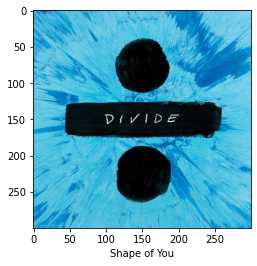

In [60]:
import matplotlib.pyplot as plt
from skimage import io

#achando o ID
nome_musica = 'Ed Sheeran - Shape of You'
id = dados[dados['artists_song']== nome_musica]['id'].iloc[0]

# na API
track = sp.track(id)
url = track["album"]["images"][1]["url"]
name = track["name"]

# Mexendo com a imagem
image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize = 10)
plt.show()

# Recomendador

## Buscando os dados da playlist

In [61]:
def recommend_id(playlist_id):
  url = []
  name = []
  for i in playlist_id:
        track = sp.track(i)
        url.append(track["album"]["images"][1]["url"])
        name.append(track["name"])
  return name, url

In [62]:
name, url = recommend_id(recomendada['id'])

In [63]:
name, url

(['Light',
  'All Through the Night',
  'Earth',
  'Turning Page',
  'West',
  'Neptune',
  'Every Little Thing She Does Is Magic',
  'Rainbow Connection',
  'North',
  "I'm Gonna Be (500 Miles)"],
 ['https://i.scdn.co/image/ab67616d00001e02e46541278af6c9ba6881cb7e',
  'https://i.scdn.co/image/ab67616d00001e0209c32d8e1f8f66a74acb38b8',
  'https://i.scdn.co/image/ab67616d00001e02e46541278af6c9ba6881cb7e',
  'https://i.scdn.co/image/ab67616d00001e0230eb992a82f895893f60375b',
  'https://i.scdn.co/image/ab67616d00001e02e46541278af6c9ba6881cb7e',
  'https://i.scdn.co/image/ab67616d00001e02e46541278af6c9ba6881cb7e',
  'https://i.scdn.co/image/ab67616d00001e02a3146ecf031deddffd710d39',
  'https://i.scdn.co/image/ab67616d00001e024e1aa82170ba0076076b9606',
  'https://i.scdn.co/image/ab67616d00001e02e46541278af6c9ba6881cb7e',
  'https://i.scdn.co/image/ab67616d00001e02a3146ecf031deddffd710d39'])

## Gerando as imagens da playlist

In [64]:
def visualize_songs(name, url):

    plt.figure(figsize=(15,10))
    columns = 5

    for i, u in enumerate(url): 
        # define o ax como o subplot, com a divisão que retorna inteiro do número urls pelas colunas + 1 (no caso, 6)
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)

        # Lendo a imagem com o Scikit Image
        image = io.imread(u)

        # Mostra a imagem
        plt.imshow(image)

        # Para deixar o eixo Y invisível 
        ax.get_yaxis().set_visible(False)

        # xticks define o local que vamos trocar os rótulos do eixo x, nesse caso, deixar os pontos de marcação brancos
        plt.xticks(color = 'w', fontsize = 0.1)

        # yticks define o local que vamos trocar os rótulos do eixo y, nesse caso, deixar os pontos de marcação brancos
        plt.yticks(color = 'w', fontsize = 0.1)

        # Colocando o nome da música no eixo x
        plt.xlabel(name[i], fontsize = 8,c='white')

        # Faz com que todos os parâmetros se encaixem no tamanho da imagem definido
        plt.tight_layout(h_pad=0.7, w_pad=0)

        # Ajusta os parâmetros de layout da imagem.
        # wspace = A largura do preenchimento entre subparcelas, como uma fração da largura média dos eixos.
        # hspace = A altura do preenchimento entre subparcelas, como uma fração da altura média dos eixos.
        plt.subplots_adjust(wspace=None, hspace=None)

        # Remove os ticks - marcadores, do eixo x, sem remover o eixo todo, deixando o nome da música.
        plt.tick_params(bottom = True)

        # Tirar a grade da imagem, gerada automaticamente pelo matplotlib
        plt.grid(visible=False)
    plt.show()
  

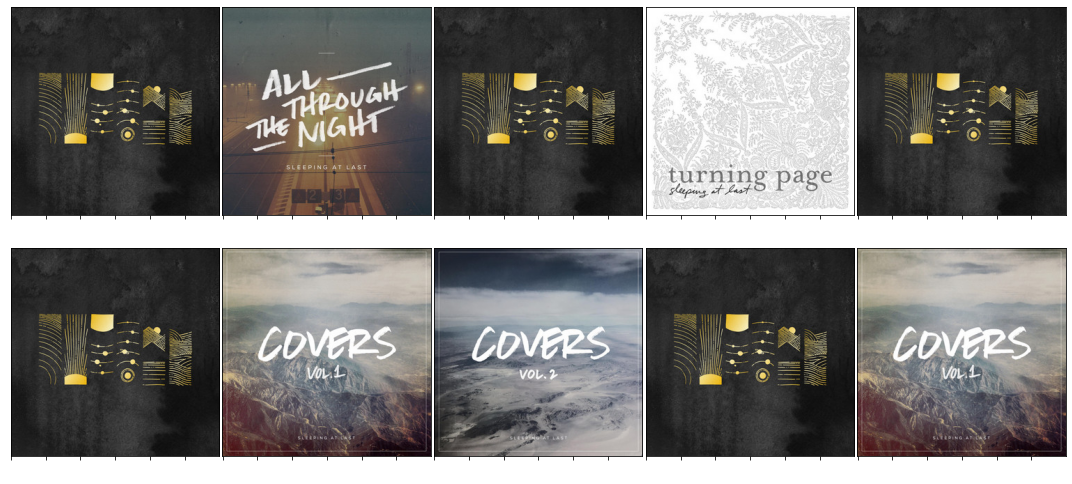

In [65]:
visualize_songs(name, url)

## Fazendo uma função final

In [66]:
def recomendador(nome_musica):

## Calculando as distâncias
  cluster = list(projection_m[projection_m['song']== nome_musica]['cluster_pca'])[0]
  musicas_recomendadas = projection_m[projection_m['cluster_pca']== cluster][[0, 1, 'song']]
  x_musica = list(projection_m[projection_m['song']== nome_musica][0])[0]
  y_musica = list(projection_m[projection_m['song']== nome_musica][1])[0]
  distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
  musicas_recomendadas['id'] = dados['id']
  musicas_recomendadas['distancias'] = distancias
  recomendada = musicas_recomendadas.sort_values('distancias').head(10)

  # ## Acessando os dados de cada música com a biblioteca Spotipy (nome e imagem)
  playlist_id = recomendada['id']

  url = []
  name = []
  for i in playlist_id:
      track = sp.track(i)
      url.append(track["album"]["images"][1]["url"])
      name.append(track["name"])

# ## Plotando as figuras
  plt.figure(figsize=(15,10))
  columns = 5
  for i, u in enumerate(url):
      ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
      image = io.imread(u)
      plt.imshow(image)
      ax.get_yaxis().set_visible(False)
      plt.xticks(color = 'w', fontsize = 0.1)
      plt.yticks(color = 'w', fontsize = 0.1)
      plt.xlabel(name[i], fontsize = 8,c='black')
      plt.tight_layout(h_pad=0.7, w_pad=0)
      plt.subplots_adjust(wspace=None, hspace=None)
      plt.grid(visible=False)
      plt.tick_params(bottom = False)
  plt.show()


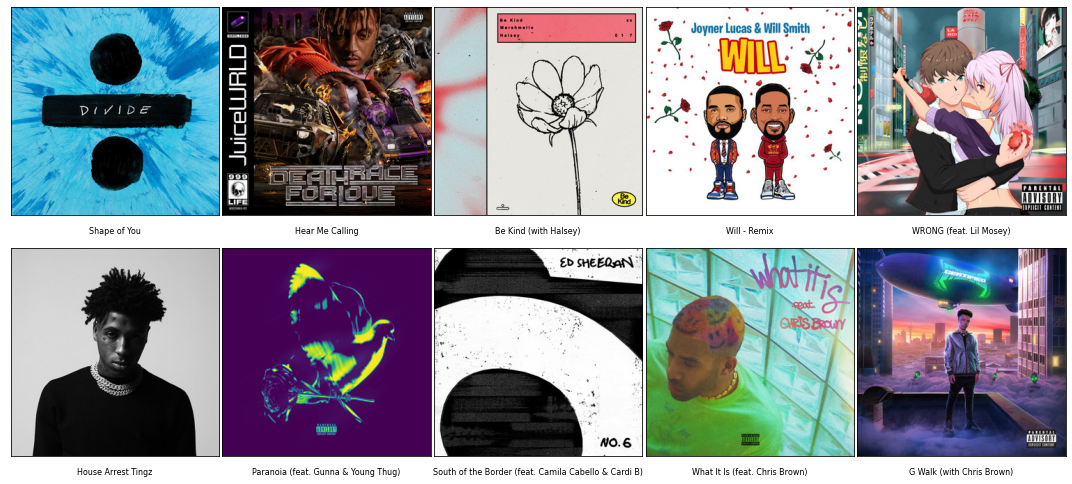

In [67]:
recomendador('Ed Sheeran - Shape of You')

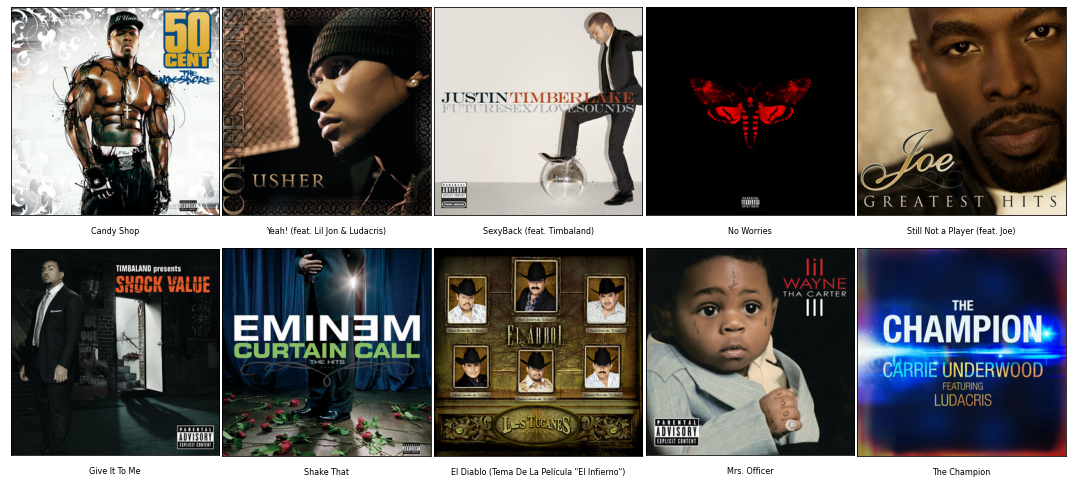

In [68]:
recomendador('50 Cent - Candy Shop')

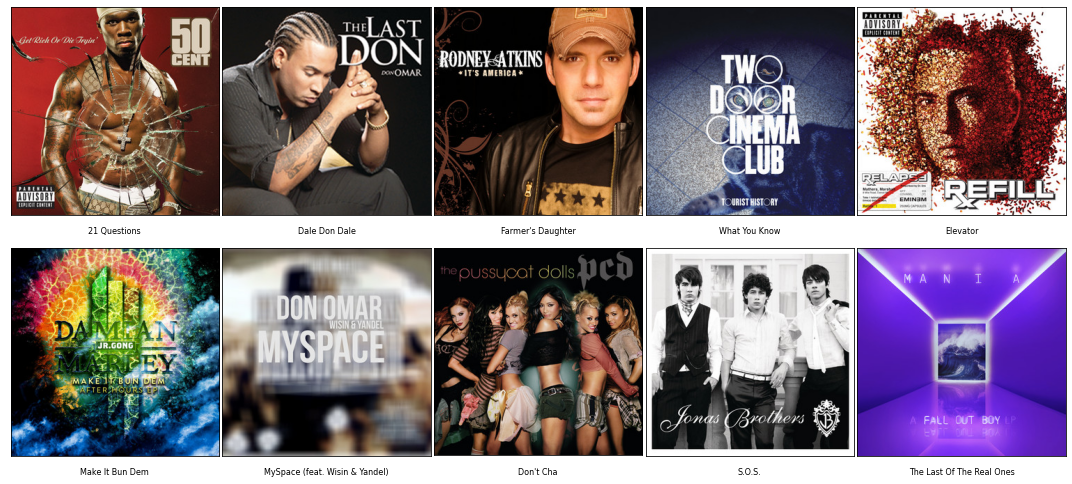

In [69]:
recomendador('50 Cent - 21 Questions')

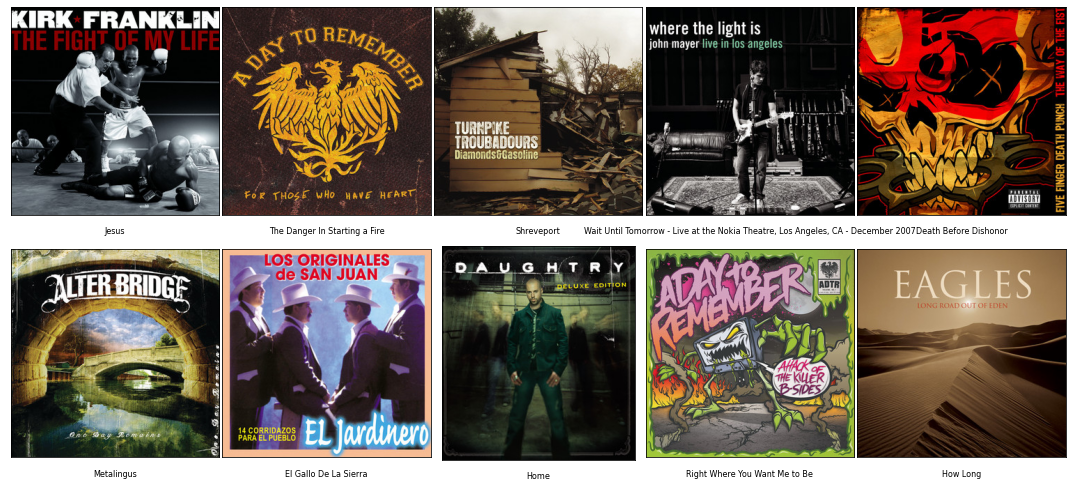

In [70]:
recomendador('Kirk Franklin - Jesus')

In [71]:
dados.query('artists=="Djonga"')

Empty DataFrame
Columns: [valence, year, acousticness, artists, danceability, duration_ms, energy, id, instrumentalness, liveness, loudness, name, popularity, speechiness, tempo, artists_song, cluster_pca]
Index: []

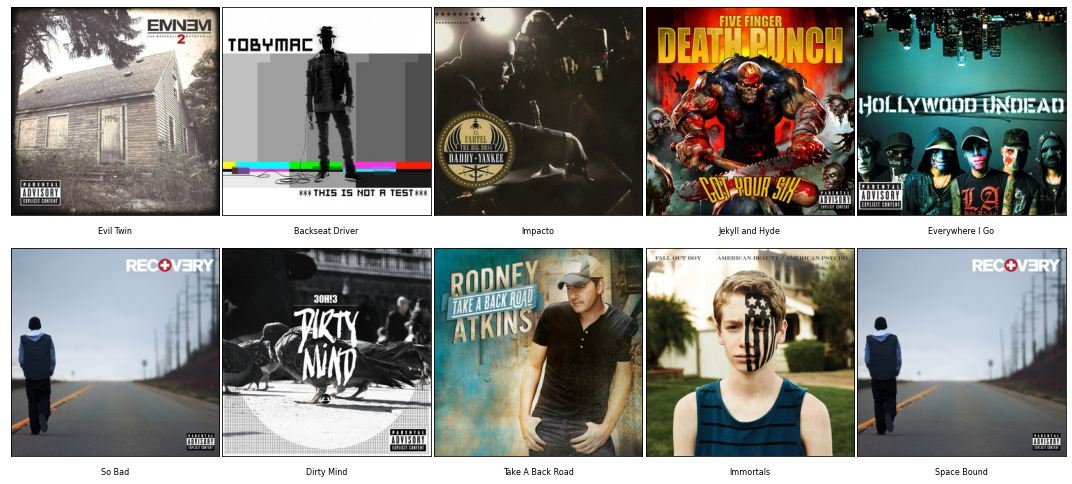

In [72]:
recomendador('Eminem - Evil Twin')